In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv(r'G:\DATA_SCIENCE\EDA\Dataset\ongc oil and energy\train_data.csv')

In [3]:
df.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [4]:
df=df.dropna()
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [5]:
df['Date']=df['Date'].astype('datetime64')

In [6]:
df.drop(df[df['Petrol (USD)']>140].index,inplace=True)

C:\Users\RANJEET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Petrol (USD)'>

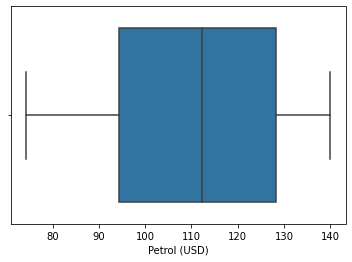

In [7]:
sns.boxplot(df['Petrol (USD)'])

C:\Users\RANJEET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Petrol (USD)'>

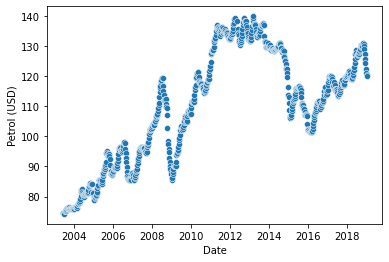

In [8]:
sns.scatterplot(df['Date'],df['Petrol (USD)'])

In [9]:
x=df.drop('Petrol (USD)', axis='columns')

In [10]:
y=df.drop('Date',axis='columns')

In [11]:
x

,Date
0,2003-06-09
1,2003-06-16
2,2003-06-23
3,2003-06-30
4,2003-07-07
...,...
808,2018-12-03
809,2018-12-10
810,2018-12-17
811,2018-12-24


In [12]:
y

,Petrol (USD)
0,74.59
1,74.47
2,74.42
3,74.35
4,74.28
...,...
808,124.30
809,122.37
810,121.02
811,120.61


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=10)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 1)
(161, 1)
(642, 1)
(161, 1)


In [15]:
ss=StandardScaler()

In [16]:
x_train=ss.fit_transform(x_train)

In [17]:
x_test=ss.transform(x_test)

In [18]:
import joblib
joblib.dump(ss,open('opp.pkl','wb'))

In [19]:
x_test

array([[-1.00263892],
       [-0.76784847],
       [ 0.58219661],
       [-0.65045325],
       [-0.40308474],
       [-0.11378937],
       [-0.26891877],
       [ 0.71636258],
       [ 1.04758482],
       [ 0.59477467],
       [ 1.41234856],
       [-0.52467265],
       [-0.69238012],
       [-0.54982877],
       [-1.20388788],
       [ 0.70797721],
       [ 0.93438228],
       [-0.87266564],
       [-0.89362907],
       [ 0.65347228],
       [ 0.69120646],
       [ 1.60940483],
       [-0.11798205],
       [-0.34438713],
       [-1.1032634 ],
       [-1.60219311],
       [ 1.09789706],
       [-0.76365579],
       [ 0.5863893 ],
       [-1.32547579],
       [-0.10121131],
       [ 1.40396318],
       [-0.96490474],
       [-0.44920429],
       [-0.91039982],
       [ 0.86310661],
       [-0.23537728],
       [ 0.28032318],
       [ 1.33268751],
       [-1.53511012],
       [-1.27516355],
       [ 0.38933303],
       [ 0.91341885],
       [-1.49737594],
       [ 1.29076065],
       [-1

In [20]:
lr=LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
reg_pred=lr.predict(x_test)

In [23]:
residual=y_test-reg_pred

In [24]:
residual

,Petrol (USD)
170,-4.843143
226,-2.429555
548,12.523576
254,7.377239
313,-4.023088
...,...
85,-12.465553
207,-2.308094
723,-10.841462
160,-0.473426


In [25]:
score=r2_score(y_test,reg_pred)

In [26]:
score

0.5451287445635643

In [27]:
test_data=pd.read_csv(r'G:\DATA_SCIENCE\EDA\Dataset\ongc oil and energy\test_data.csv')

In [28]:
test_data=test_data.drop('Prediction',axis='columns')

In [29]:
test_data['Date']=test_data['Date'].astype('datetime64')

In [30]:
value=ss.transform(test_data)

In [31]:
lr.predict(value)

array([[133.54921988],
       [133.55750155],
       [133.56578321],
       [133.57406487],
       [133.58234654],
       [133.5906282 ],
       [133.59890986],
       [133.60719153],
       [133.61547319],
       [133.62375485],
       [133.63203652],
       [133.64031818],
       [136.57202702],
       [136.58030869],
       [136.58859035],
       [136.59687201]])

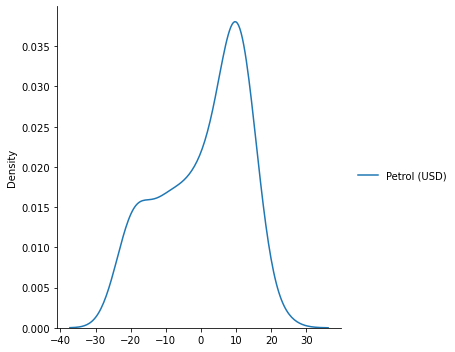

In [32]:
sns.displot(reg_pred-y_test,kind='kde')

In [33]:
score=r2_score(y_test,reg_pred)

In [34]:
score

0.5451287445635643

In [35]:
import joblib

In [36]:
joblib.dump(lr,"Oil_Price_Prediction.pkl")

['Oil_Price_Prediction.pkl']

In [37]:
model=joblib.load("Oil_Price_Prediction.pkl")

In [38]:
model.predict(value)

array([[133.54921988],
       [133.55750155],
       [133.56578321],
       [133.57406487],
       [133.58234654],
       [133.5906282 ],
       [133.59890986],
       [133.60719153],
       [133.61547319],
       [133.62375485],
       [133.63203652],
       [133.64031818],
       [136.57202702],
       [136.58030869],
       [136.58859035],
       [136.59687201]])

In [46]:
a='1/12/2022'

In [47]:
df2=pd.DataFrame([a],columns=['Date1'])

In [48]:
df2

,Date1
0,1/12/2022


In [50]:
df3=df2['Date1'].astype('datetime64')

In [51]:
value=ss.transform([df3])

C:\Users\RANJEET\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
lr.predict(value)

array([[142.71702126]])

In [53]:
model.predict(value)[0][0]

142.7170212610328